In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import missingno as msn #Missingno library offers a very nice way to visualize the distribution of NaN(not a number) values.Using matrix, barplot,... of this
    # library you can very quickly find the pattern of missingness, the number of nan values in a col,... in the dataset.
import warnings
warnings.filterwarnings('ignore')


In [2]:
store= pd.read_csv('https://raw.githubusercontent.com/massardier/proj/main/rossman_store.csv')

train1= pd.read_csv('https://raw.githubusercontent.com/massardier/proj/main/rossman_train1.csv')
train2= pd.read_csv('https://raw.githubusercontent.com/massardier/proj/main/rossman_train2.csv')
#splitting the train into 2 because, because it is bigger than what github allows
train = pd.concat([train1,train2])


# Read the data

In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 508604
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Unnamed: 0     1017209 non-null  int64 
 1   Store          1017209 non-null  int64 
 2   DayOfWeek      1017209 non-null  int64 
 3   Date           1017209 non-null  object
 4   Sales          1017209 non-null  int64 
 5   Customers      1017209 non-null  int64 
 6   Open           1017209 non-null  int64 
 7   Promo          1017209 non-null  int64 
 8   StateHoliday   1017209 non-null  object
 9   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 85.4+ MB


# Visualisation

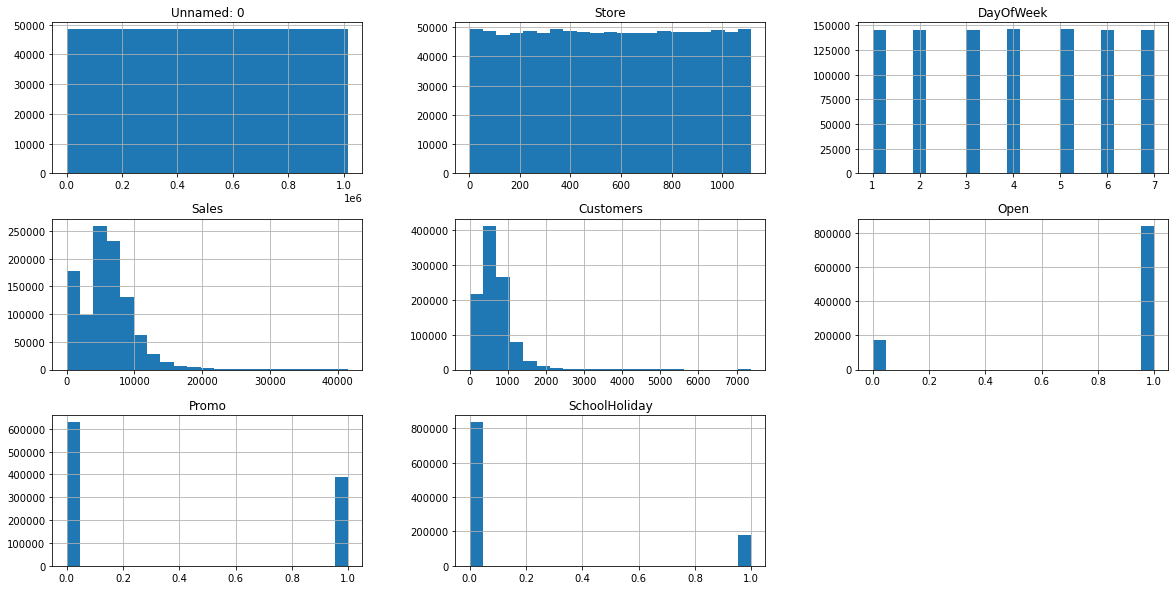

In [5]:
#Histograms are a type of plot where you can look at the distribution of one variable. / bins = int or sequence

train.hist(bins='sturges', figsize=(20,10)); 

# putting ; at the end of the visualization line of code, eliminate all the info about the plot that appears while drawing.
# we can use a method known as Sturges’ Rule to determine the optimal number of bins to use in a histogram, bins = 'struges'

In [6]:
# Change the DayOfWeek to days names:

day_map ={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
train['DayOfWeek'] = train['DayOfWeek'].map(day_map)

#pandas map() function from Series is used to substitute each value in a Series with another value, that may be derived from a function, a dict or a Series.

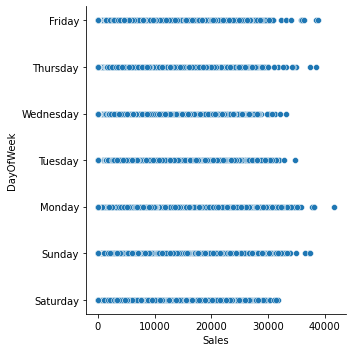

In [7]:
sns.relplot(data=train, x='Sales', y= 'DayOfWeek');

#Scatterplots display the relationship between two dimensions in your data (=columns).

# Merging datasets

In [8]:
merg_df = store.merge(train, on='Store', how='outer')
merg_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 0,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,Friday,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1115,Thursday,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2230,Wednesday,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3345,Tuesday,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4460,Monday,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1012749,Saturday,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1013864,Friday,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1014979,Thursday,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1016094,Wednesday,2013-01-02,3697,305,1,0,0,1


In [9]:
merg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  Unnamed: 0                 1017209 non-null  int64  
 11  DayOfWeek                  1017209 non-null  object 
 12  Date                       1017209 non-null  object 
 13  Sales       

In [10]:
#merg_df.query('Promo2 == 1') #the only rows that promo2 was active
# notice Promo2!, when promo2 ...?

# To understand the date

In [11]:
# Extracting Year, Month and Day from date:

merg_df['Date']= pd.to_datetime(merg_df['Date'])
merg_df['Year']=merg_df['Date'].dt.year
merg_df['Month']=merg_df['Date'].dt.month
merg_df['Day']=merg_df['Date'].dt.day
merg_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-30,5020,546,1,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-29,4782,523,1,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-28,5011,560,1,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-27,6102,612,1,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,2013,1,5
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,2013,1,4
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,2013,1,3
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-02,3697,305,1,0,0,1,2013,1,2


In [12]:
merg_df['Month_Name']=merg_df['Date'].dt.month_name()
merg_df['Month_Name']=merg_df['Month_Name'].str[:3]
merg_df
# Task: extract the week number

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Month_Name
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5263,555,1,1,0,1,2015,7,31,Jul
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5020,546,1,1,0,1,2015,7,30,Jul
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,4782,523,1,1,0,1,2015,7,29,Jul
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5011,560,1,1,0,1,2015,7,28,Jul
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,6102,612,1,1,0,1,2015,7,27,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,4771,339,1,0,0,1,2013,1,5,Jan
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,4540,326,1,0,0,1,2013,1,4,Jan
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,4297,300,1,0,0,1,2013,1,3,Jan
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,3697,305,1,0,0,1,2013,1,2,Jan


In [13]:
# To extract the week we need to use isocalndar

merg_df ['Week'] = merg_df ['Date'].dt.isocalendar().week
merg_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Month_Name,Week
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,555,1,1,0,1,2015,7,31,Jul,31
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,546,1,1,0,1,2015,7,30,Jul,31
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,523,1,1,0,1,2015,7,29,Jul,31
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,560,1,1,0,1,2015,7,28,Jul,31
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,612,1,1,0,1,2015,7,27,Jul,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,339,1,0,0,1,2013,1,5,Jan,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,326,1,0,0,1,2013,1,4,Jan,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,300,1,0,0,1,2013,1,3,Jan,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,305,1,0,0,1,2013,1,2,Jan,1


In [14]:
# Randomly chack a row that there is week number
merg_df.iloc[1017204]

Store                                       1115
StoreType                                      d
Assortment                                     c
CompetitionDistance                       5350.0
CompetitionOpenSinceMonth                    NaN
CompetitionOpenSinceYear                     NaN
Promo2                                         1
Promo2SinceWeek                             22.0
Promo2SinceYear                           2012.0
PromoInterval                   Mar,Jun,Sept,Dec
Unnamed: 0                               1012749
DayOfWeek                               Saturday
Date                         2013-01-05 00:00:00
Sales                                       4771
Customers                                    339
Open                                           1
Promo                                          0
StateHoliday                                   0
SchoolHoliday                                  1
Year                                        2013
Month               

In [15]:
# Replace any word! here we used NA to replace it with missing data in PromoInterval

merg_df['PromoInterval'].fillna('NA', inplace = True)
merg_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Month_Name,Week
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,555,1,1,0,1,2015,7,31,Jul,31
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,546,1,1,0,1,2015,7,30,Jul,31
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,523,1,1,0,1,2015,7,29,Jul,31
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,560,1,1,0,1,2015,7,28,Jul,31
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,612,1,1,0,1,2015,7,27,Jul,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,339,1,0,0,1,2013,1,5,Jan,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,326,1,0,0,1,2013,1,4,Jan,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,300,1,0,0,1,2013,1,3,Jan,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,305,1,0,0,1,2013,1,2,Jan,1


In [16]:
type(merg_df['Promo2SinceYear'][0])

numpy.float64

In [17]:
# Change the value of Promo2SinceWeek into integer:

merg_df['Promo2SinceWeek'].astype(int, errors='ignore') # not enough data, we droped the column

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
1017204    22.0
1017205    22.0
1017206    22.0
1017207    22.0
1017208    22.0
Name: Promo2SinceWeek, Length: 1017209, dtype: float64

In [18]:
# Creating masks for year, month and week to filter the dataset to everywhere Promo2 exists: 

year_mask = merg_df['Year']>= merg_df['Promo2SinceYear']
month_mask = merg_df.apply(lambda x: x.Month_Name in x.PromoInterval, axis=1)
week_mask =merg_df['Week']>= merg_df['Promo2SinceWeek']

In [19]:
# And is only usable for 2 boolean, but & can be used to a series of boolean

promo2_mask = year_mask & month_mask & week_mask
promo2_mask.value_counts() 

False    932653
True      84556
dtype: Int64

In [20]:
# Days that Promot2 was active:

merg_df['Promo2Active'] = promo2_mask
merg_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Month_Name,Week,Promo2Active
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,1,1,0,1,2015,7,31,Jul,31,False
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,1,1,0,1,2015,7,30,Jul,31,False
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,1,1,0,1,2015,7,29,Jul,31,False
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,1,1,0,1,2015,7,28,Jul,31,False
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NA,...,1,1,0,1,2015,7,27,Jul,31,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,1,0,0,1,2013,1,5,Jan,1,False
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,1,0,0,1,2013,1,4,Jan,1,False
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,1,0,0,1,2013,1,3,Jan,1,False
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,1,0,0,1,2013,1,2,Jan,1,False


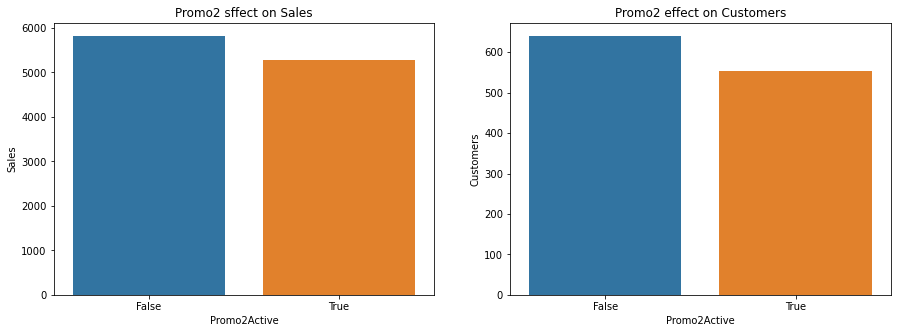

In [21]:
# Does promotions(Promo2) have a big effect on Sales? Do sales and customers increase significantly during promotions?

merg_df_promo2_sale = merg_df.groupby('Promo2Active').Sales.mean().reset_index()
merg_df_promo2_customer = merg_df.groupby('Promo2Active').Customers.mean().reset_index()


fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='Promo2Active', y='Sales', data=merg_df_promo2_sale, ax=axes[0]);
axes[0].title.set_text('Promo2 sffect on Sales')
sns.barplot(x='Promo2Active', y='Customers', data=merg_df_promo2_customer, ax=axes[1]);
axes[1].title.set_text('Promo2 effect on Customers')


## Decide on dropping columns

In [22]:
merg_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Unnamed: 0',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Month_Name',
       'Week', 'Promo2Active'],
      dtype='object')

In [23]:
merg_df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                     0
Unnamed: 0                        0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
Month_Name                        0
Week                              0
Promo2Active                      0
dtype: int64

In [24]:
merg_df.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'], inplace= True, axis=1)

#since we have the promo2active col in our table, then we can remove the other cols related to promo2

In [25]:
# The competition was not actually opened for some dates so we replace the distance with na
mask_comp_not_opened_yet = merg_df['Year'] < merg_df['CompetitionOpenSinceYear']
merg_df.loc[mask_comp_not_opened_yet,'CompetitionDistance'] = np.nan

In [26]:
# we replaced missing month and year for competition opening because there was competition
# but not info about the opening. We assume that the opening happened a long time
# and that whoever provided this info did not remember
# So we replaced them with the oldest year and month in the dataset

mask_comp_dist_na = merg_df['CompetitionDistance'].isna()
mask_comp_since_month_na = merg_df['CompetitionOpenSinceMonth'].isna()

merg_df.loc[~mask_comp_dist_na & mask_comp_since_month_na,'CompetitionOpenSinceYear'] = merg_df['CompetitionOpenSinceYear'].min()
merg_df.loc[~mask_comp_dist_na & mask_comp_since_month_na,'CompetitionOpenSinceMonth'] = merg_df['CompetitionOpenSinceMonth'].min()

In [27]:
# we replaced missing month and year for competition opening with valures in the future 
# because there was no competition

merg_df.loc[mask_comp_dist_na,'CompetitionOpenSinceYear'] = merg_df['Year'].max() + 1
merg_df.loc[mask_comp_dist_na & mask_comp_since_month_na,'CompetitionOpenSinceMonth'] = 12

In [28]:
# Our assumption is that the absence of CompetitionDistance means no competition.
# We'll fill it with a large value (the largest observed in this column) to
# reflect the fact that the competition doesn't a strong impact but have a number anyway
max_comp_distance = merg_df['CompetitionDistance'].max()
merg_df['CompetitionDistance'] = merg_df['CompetitionDistance'].fillna(max_comp_distance)

In [29]:
merg_df['CompetitionDistance'].median()

2640.0

In [30]:
#filling the NaN values in competiton distance with the median (the middle value of the col)

#merg_df['CompetitionDistance'].fillna(merg_df['CompetitionDistance'].median(), inplace=True)

In [31]:
#merg_df.fillna(0, inplace=True)

In [32]:
merg_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Unnamed: 0                   0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
Month_Name                   0
Week                         0
Promo2Active                 0
dtype: int64

In [33]:
merg_df['CompetitionOpenSinceYear'].mode()

0    1900.0
Name: CompetitionOpenSinceYear, dtype: float64

In [34]:
merg_df['CompetitionOpenSinceMonth'].mode()

0    1.0
Name: CompetitionOpenSinceMonth, dtype: float64

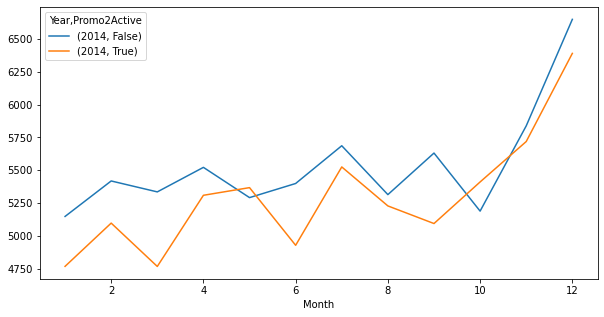

In [35]:
# calculate total sales per month year

merg_df[(merg_df.Year==2014)&(merg_df.Promo2==1)].groupby(['Month','Year','Promo2Active'])['Sales'].mean().unstack(['Year','Promo2Active']).plot(figsize=(10,5));

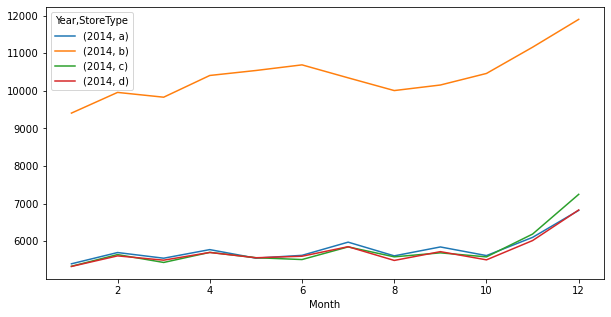

In [36]:
merg_df[(merg_df.Year==2014)].groupby(['Month','Year','StoreType'])['Sales'].mean().unstack(['Year','StoreType']).plot(figsize=(10,5));

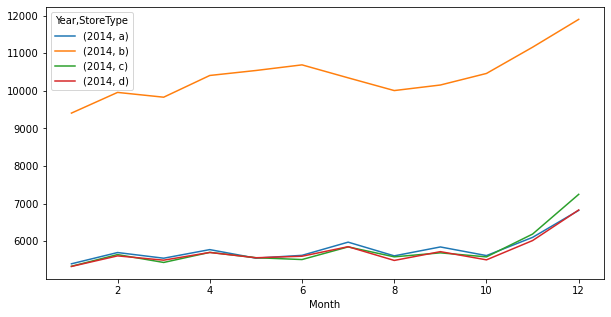

In [37]:
merg_df[(merg_df.Year==2014)].groupby(['Month','Year','StoreType'])['Sales'].mean().unstack(['Year','StoreType']).plot(figsize=(10,5));

## Effect of holidays

In [38]:
merg_df['StateHoliday'].value_counts()

# 0: Noneschoolholiday
# a: publicholiday 
# b: Easter
# c: christmas

0    789551
0    196608
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [39]:
day_map ={0:'Nostateholiday', 1:'Stateholiday', 'a':'Publicholiday', 'b':'Easter', 'c':'christmas'}
merg_df['StateHoliday'] = merg_df['StateHoliday'].map(day_map)

In [40]:
# Change holidays to names:

day_map ={0:'Nonschoolholiday', 1:'Schoolholiday'}
merg_df['SchoolHoliday'] = merg_df['SchoolHoliday'].map(day_map)


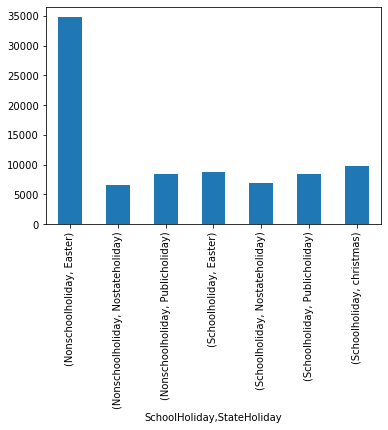

In [42]:
merg_df[merg_df.Open==1].groupby(['SchoolHoliday','StateHoliday']).Sales.mean().plot.bar();


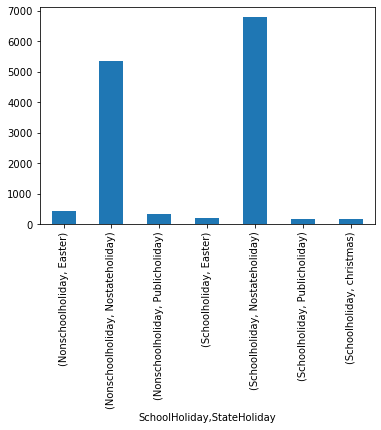

In [43]:
merg_df.groupby(["SchoolHoliday","StateHoliday"]).Sales.mean().plot.bar();

In [44]:
merg_df['Sales_per_Customers'] = merg_df.Sales / merg_df.Customers
merg_df[['Date','Sales','Customers','Sales_per_Customers']]

,Date,Sales,Customers,Sales_per_Customers
0,2015-07-31,5263,555,9.482883
1,2015-07-30,5020,546,9.194139
2,2015-07-29,4782,523,9.143403
3,2015-07-28,5011,560,8.948214
4,2015-07-27,6102,612,9.970588
...,...,...,...,...
1017204,2013-01-05,4771,339,14.073746
1017205,2013-01-04,4540,326,13.926380
1017206,2013-01-03,4297,300,14.323333
1017207,2013-01-02,3697,305,12.121311


<AxesSubplot:xlabel='Month'>

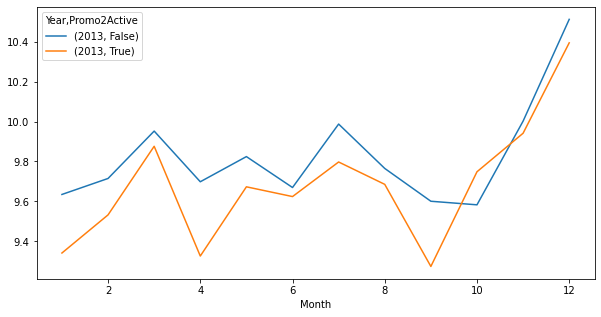

In [45]:
merg_df[(merg_df.Year==2013)&(merg_df.Promo2==1)].groupby(["Month","Year","Promo2Active"])['Sales_per_Customers'].mean().unstack(["Year","Promo2Active"]).plot(figsize=(10,5))

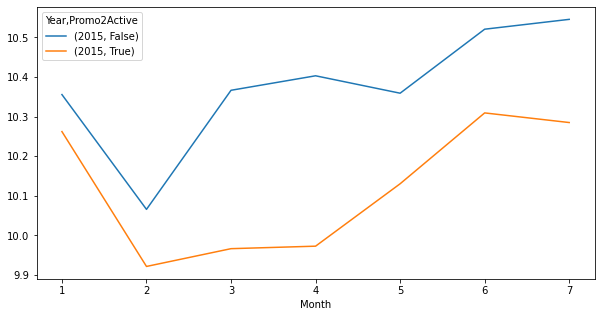

In [46]:
merg_df[(merg_df.Year==2015)&(merg_df.Promo2==1)].groupby(["Month","Year","Promo2Active"])['Sales_per_Customers'].mean().unstack(["Year","Promo2Active"]).plot(figsize=(10,5));

In [47]:
#sns.catplot(x="Month", y="Sales", hue="Promo2Active", col="Year",data=merg_df, kind="swarm", height=4, aspect=.7, palette="Set3")


# Task: Try to visualize sales vs. open/ holidays

> Indented block



In [48]:
# When stores are open and sales are zero
salezero_storeopen = merg_df[(merg_df.Open ==1) & (merg_df.Sales==0)].shape[0]
salezero_storeopen

54

In [49]:
merg_df [(merg_df.Open == 0)].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [50]:
train.isnull().sum()

Unnamed: 0       0
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# More visualization from merged dataset

In [51]:
# To know which time period to expect from this data:

print(merg_df['Date'].min())
print(merg_df['CompetitionOpenSinceYear'].max())

2013-01-01 00:00:00
2016.0


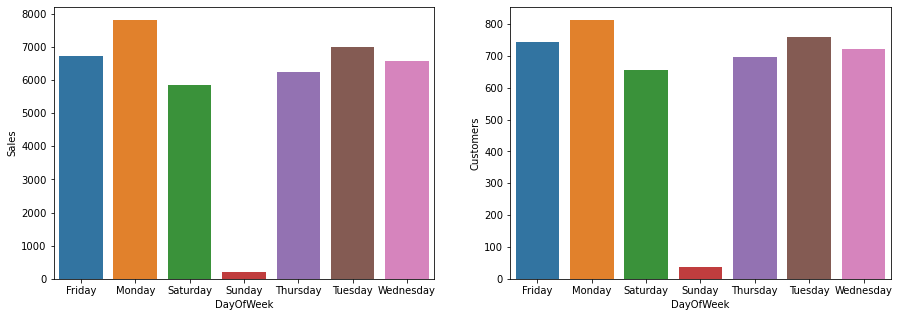

In [52]:
# How much of sales happened on which days of the week? How is the relation with number of customers?

merg_df_by_sale = merg_df.groupby('DayOfWeek').Sales.mean().reset_index()
merg_df_by_customer = merg_df.groupby('DayOfWeek').Customers.mean().reset_index()


fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='DayOfWeek', y='Sales', data=merg_df_by_sale, ax=axes[0]);
sns.barplot(x='DayOfWeek', y='Customers', data=merg_df_by_customer, ax=axes[1]);

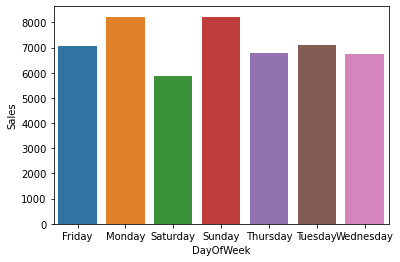

In [53]:
mask_open = merg_df.Open ==1

merg_df_by_day = merg_df.loc[mask_open].groupby('DayOfWeek').Sales.mean().reset_index()

sns.barplot(x='DayOfWeek', y='Sales', data=merg_df_by_day);

In [54]:
# Rename: Promo is active where=1 and inactive where=0:

promo_map ={0:'Inactive', 1:'Active'}
merg_df['Promo'] = merg_df['Promo'].map(promo_map)

In [55]:
# we need to have the mean of sales before plotting that. And to keep the Sales and Promo as columns you need to put
# .reset_index() and Sales in double[]

promo_mean= train.groupby('Promo')[['Sales']].mean().reset_index()
promo_mean

,Promo,Sales
0,0,4406.050805
1,1,7991.152046


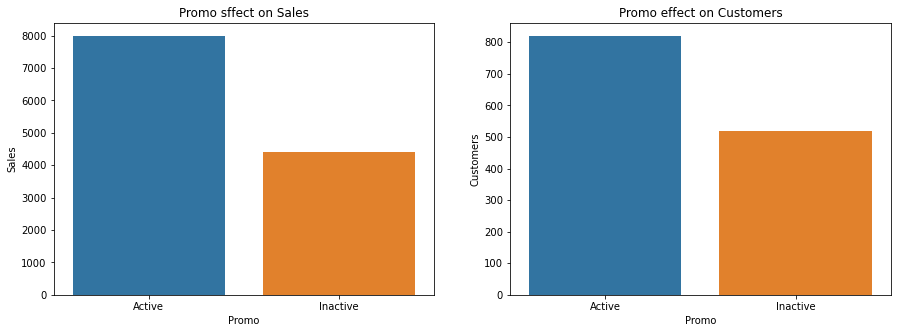

In [77]:
# Does promotions have a big effect on Sales? Do sales and customers increase significantly during promotions?
#Create two subplots and unpack the output array immediately:

merg_df_promo_sale = merg_df.groupby('Promo').Sales.mean().reset_index()
merg_df_promo_customer = merg_df.groupby('Promo').Customers.mean().reset_index()


fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='Promo', y='Sales', data=merg_df_promo_sale, ax=axes[0]);
axes[0].title.set_text('Promo sffect on Sales')
sns.barplot(x='Promo', y='Customers', data=merg_df_promo_customer, ax=axes[1]);
axes[1].title.set_text('Promo effect on Customers')


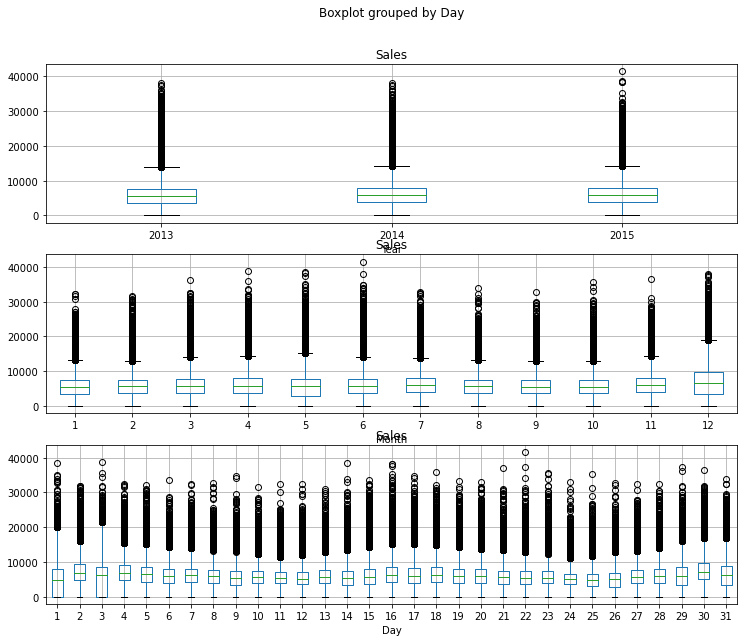

In [57]:
# plenty of outliers :) but there is no need to remove them since the sales fluctuate between
# 0 to about 42000 Euros

fig, (axis1, axis2, axis3) = plt.subplots(3, 1,figsize=(12,10))

merg_df.boxplot(column='Sales', by='Year', ax=axis1) #2013 2014,2015
merg_df.boxplot(column='Sales', by='Month', ax=axis2)
merg_df.boxplot(column='Sales', by='Day', ax=axis3)
plt.show()

# Missing data

In [58]:
merg_df.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Unnamed: 0                        0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                 789551
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
Month_Name                        0
Week                              0
Promo2Active                      0
Sales_per_Customers          172869
dtype: int64

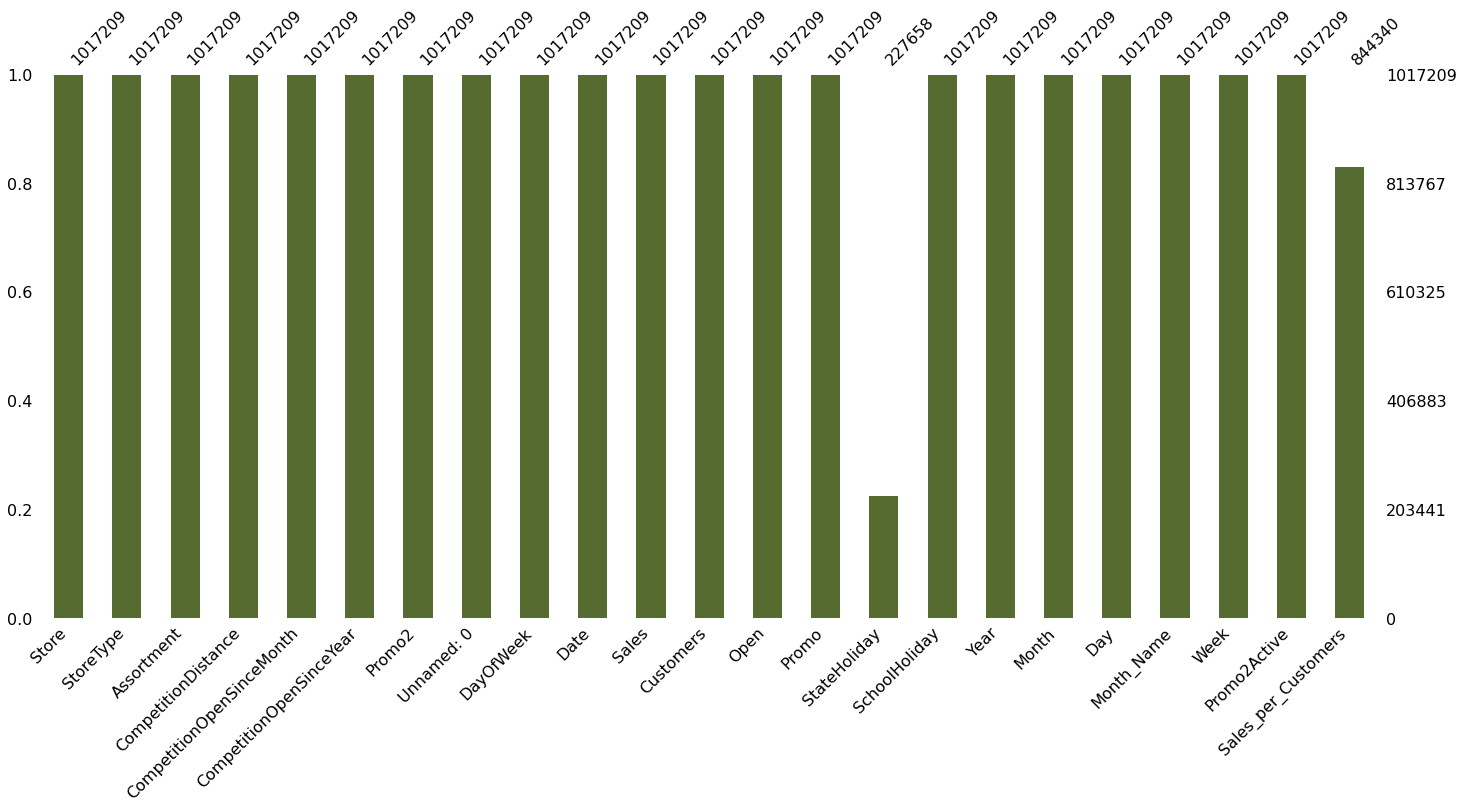

In [59]:
msn.bar(merg_df, color='darkolivegreen');

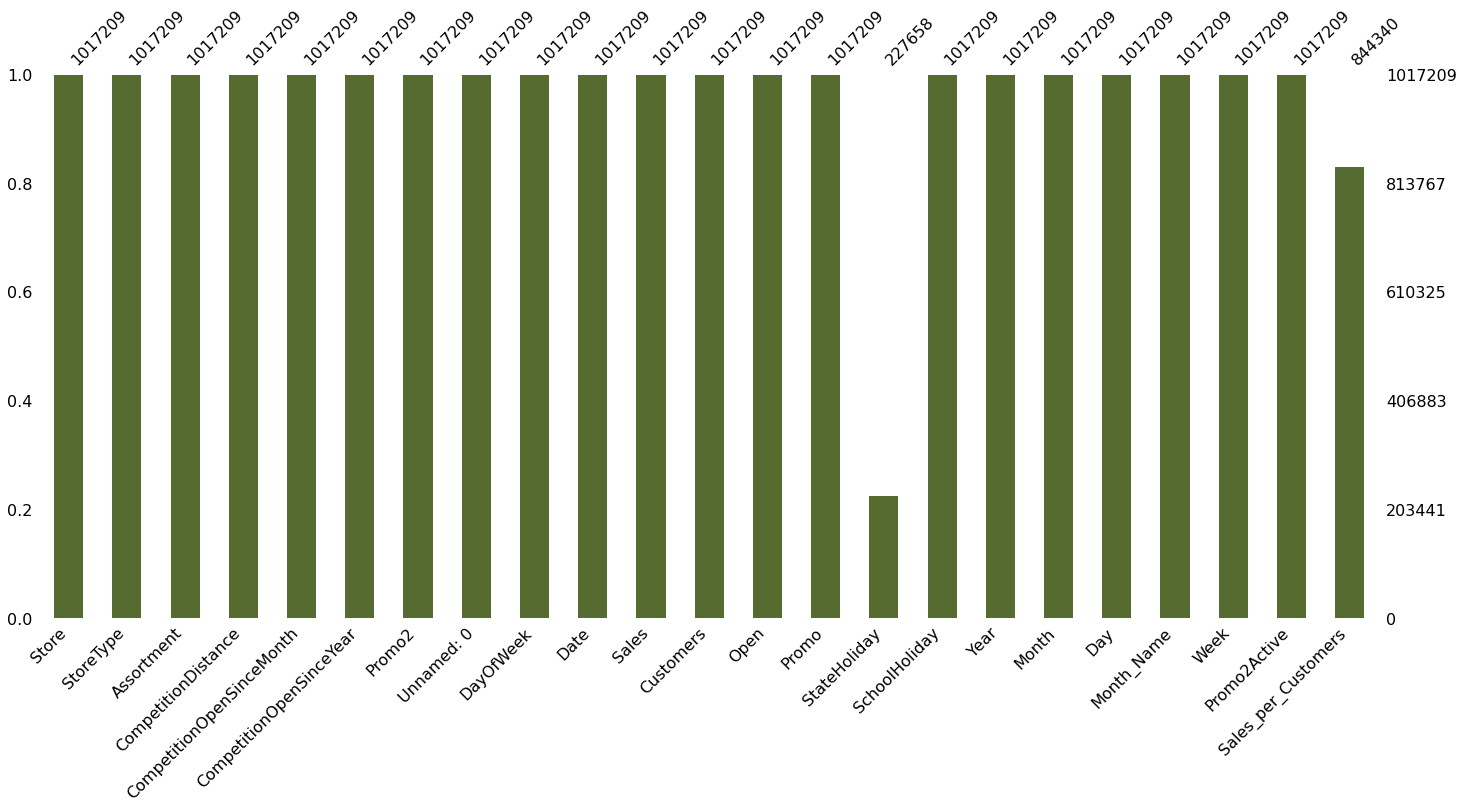

In [60]:
#merg_df.drop(['Sales_per_Customers'], inplace= True, axis=1)
msn.bar(merg_df, color='darkolivegreen');

In [61]:
# Make a copy of dataset to prevent any distruption

data = merg_df.copy()

In [62]:
merg_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Unnamed: 0', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'Month_Name', 'Week', 'Promo2Active', 'Sales_per_Customers'],
      dtype='object')

In [63]:
merg_df.Year < merg_df.CompetitionOpenSinceYear

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [64]:
# Check for duplicate data: There is no duplicates

print("Rows before dropping duplicates: " + str(data.shape[0]))
data = data.drop_duplicates()
print("Rows after dropping duplicates: " + str(data.shape[0]))

Rows before dropping duplicates: 1017209
Rows after dropping duplicates: 1017209


In [65]:
data.isna().sum()

# It seems that there is a pattern for not having a data where:
# There was a competition or not
# And if there was Promo2 runing or not 

# It means these are not missing values but there is lack of data
# What to do? is it a good idea to replace them with the mean value?!!!

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Unnamed: 0                        0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                 789551
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
Month_Name                        0
Week                              0
Promo2Active                      0
Sales_per_Customers          172869
dtype: int64